In [4]:
import pandas as pd
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier#1
from sklearn.tree import DecisionTreeClassifier#2
from sklearn.ensemble import RandomForestClassifier#3
from sklearn.linear_model import LogisticRegression#4
from sklearn.svm import SVC#5
from xgboost import XGBClassifier#6
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support, classification_report
from sklearn import preprocessing
from PIL import Image
import skimage
from PIL import Image
import IPython.display as display
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [5]:
def image_to_feature_vector(image, size=(150, 150)):
        
     # resize the image to a fixed size, then flatten the image into
     # a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

def extract_color_histogram(image, bins=(32, 32, 32)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	hist = cv2.calcHist([rgb], [0, 1, 2], None, bins,[0, 256, 0, 256, 0, 256])

	# handle normalizing the histogram if we are using OpenCV 2.4.X
	hist = cv2.normalize(hist, hist)
	flatten_feature = hist.flatten()
	# return the flattened histogram as the feature vector
	return flatten_feature

In [8]:
#dataset1


dir1 = '/content/drive/MyDrive/تسک 03_دیتاهای اب مروارید/ALL_03/ALL/ALL_new'
#dir1 = 'E:/Heart/Universal/final'
def fetch_cataract(dir):
    raw_image = []
    health_state =[]
    features = []
    c=0

    for filename in os.listdir(dir1):
        category = filename.split('_')[0]
        if category == 'cat':
                health_state.append(1)
        else:
                health_state.append(0)
        image =cv2.imread(os.path.join(dir1,filename))
        flatten_feature = extract_color_histogram(image, bins=(32, 32, 32))
        pixel = image_to_feature_vector(image, size=(150, 150))
        raw_image.append(pixel)
        features.append(flatten_feature)
    raw_image = np.array(raw_image)
    health_state = np.array(health_state)
    features = np.array(features)
    #df=pd.DataFrame({ 'pixel_image':os.listdir(dir1), 'features':features, 'HEALTH':health_state})
    return raw_image, health_state, features 
raw_image, health_state, features = fetch_cataract(dir1)


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
(trainX, testX, trainY, testY ) = train_test_split(features, health_state, test_size= 0.3, random_state=20,shuffle=True)

In [10]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(112, 32768)
(112,)
(49, 32768)
(49,)


In [11]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score,roc_curve,f1_score, auc

y_pred_xgb= [1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0
 1 1 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.7755102040816326
Classification Report : 

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        25
           1       0.81      0.71      0.76        24

    accuracy                           0.78        49
   macro avg       0.78      0.77      0.77        49
weighted avg       0.78      0.78      0.77        49

Classification Report train : 

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        60
           1       0.88      0.87      0.87        52

    accuracy                           0.88       112
   macro avg       0.88      0.88      0.88       112
weighted avg       0.88      0.88      0.88       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

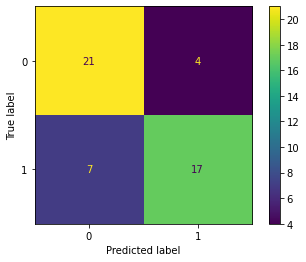

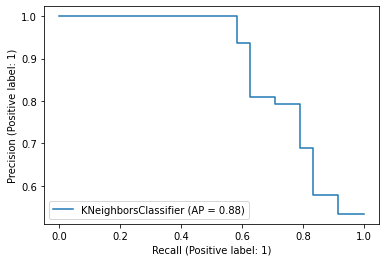

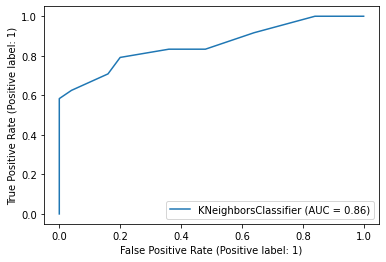

In [12]:
#KNN
model_KNN=KNeighborsClassifier(n_neighbors=10)
model_KNN.fit(trainX,trainY)
y_pred_Test = model_KNN.predict(testX)
y_pred_Train = model_KNN.predict(trainX)
test_acc = accuracy_score(testY, y_pred_Test)
print("y_pred_xgb=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))

KNeighborsClassifier = KNeighborsClassifier(n_neighbors=10)
KNeighborsClassifier= KNeighborsClassifier.fit(trainX, trainY)
plot_confusion_matrix(KNeighborsClassifier,testX,testY)
plot_precision_recall_curve(KNeighborsClassifier,testX,testY)
plot_roc_curve(KNeighborsClassifier,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of KNN
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=KNeighborsClassifier)

In [13]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(KNeighborsClassifier(), X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(KNeighborsClassifier(), X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print(statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

0.8823529411764706
0.9375
0.875
0.9375
0.875
0.875
0.9375
0.9375
1.0
0.875
0.913235294117647


In [14]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
cross_val_score = cross_val_score(KNeighborsClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 86.47058823529412


y_pred_xgb= [1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.8571428571428571
Classification Report : 

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        25
           1       0.95      0.75      0.84        24

    accuracy                           0.86        49
   macro avg       0.87      0.85      0.85        49
weighted avg       0.87      0.86      0.86        49

Classification Report train : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        52

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

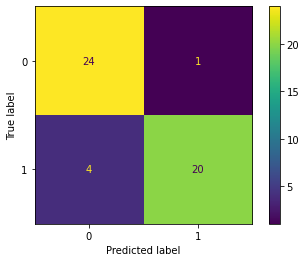

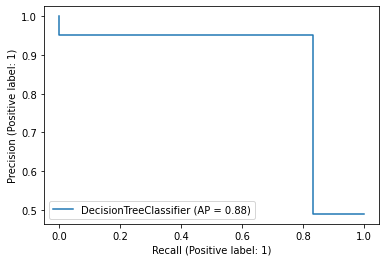

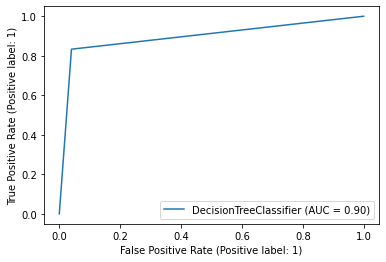

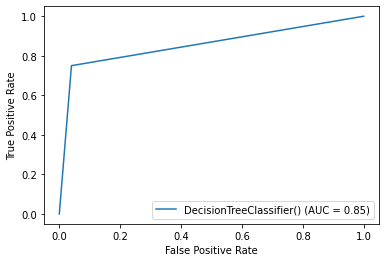

In [15]:
#Decision Tree
model_DT=DecisionTreeClassifier()
model_DT.fit(trainX,trainY)
y_pred_Test = model_DT.predict(testX)
y_pred_Train = model_DT.predict(trainX)
test_acc = accuracy_score(testY, y_pred_Test)
print("y_pred_xgb=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))

DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier= DecisionTreeClassifier.fit(trainX, trainY)
plot_confusion_matrix(DecisionTreeClassifier,testX,testY)
plot_precision_recall_curve(DecisionTreeClassifier,testX,testY)
plot_roc_curve(DecisionTreeClassifier,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of Decision Tree 
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=DecisionTreeClassifier)
display.plot()

In [16]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(DecisionTreeClassifier(), X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(DecisionTreeClassifier(), X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print(statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

1.0
1.0
1.0
0.9375
0.9375
0.9375
0.9375
0.8125
0.9375
0.875
0.9128676470588235


In [17]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier = DecisionTreeClassifier()
cross_val_score = cross_val_score(DecisionTreeClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 94.52205882352942


y_pred_xgb= [1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.9387755102040817
Classification Report : 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.88      0.93        24

    accuracy                           0.94        49
   macro avg       0.95      0.94      0.94        49
weighted avg       0.95      0.94      0.94        49

Classification Report train : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        52

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

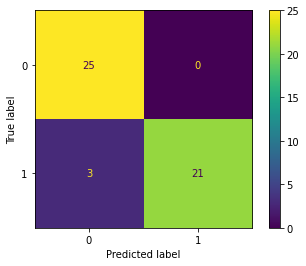

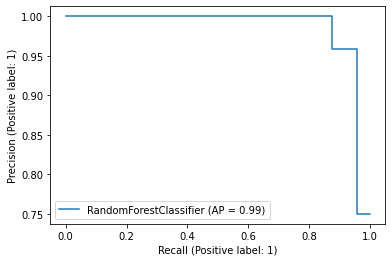

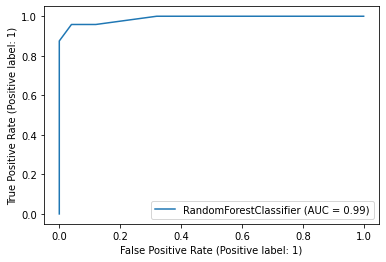

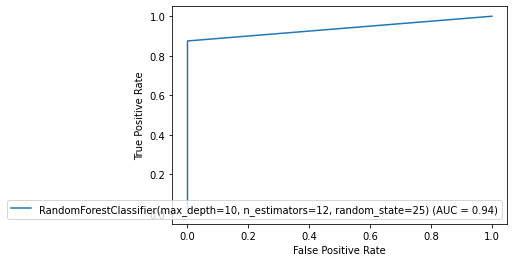

In [18]:
#Random Forest
model_RF=RandomForestClassifier(n_estimators =12, max_depth =10, random_state=25) 
model_RF.fit(trainX,trainY)
y_pred_Test = model_RF.predict(testX)
y_pred_Train = model_RF.predict(trainX)
test_acc = accuracy_score(testY, y_pred_Test)
print("y_pred_xgb=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))

RandomForestClassifier = RandomForestClassifier(n_estimators =12, max_depth =10, random_state=25) 
RandomForestClassifier= RandomForestClassifier.fit(trainX, trainY)
plot_confusion_matrix(RandomForestClassifier,testX,testY)
plot_precision_recall_curve(RandomForestClassifier,testX,testY)
plot_roc_curve(RandomForestClassifier,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of Random Forest 
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=RandomForestClassifier)
display.plot()

In [19]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(RandomForestClassifier(), X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(RandomForestClassifier(), X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print(statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

1.0
1.0
0.9375
1.0
0.9375
0.9375
1.0
1.0
1.0
1.0
0.96875


In [20]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
cross_val_score = cross_val_score(RandomForestClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 97.57352941176471


y_pred_xgb= [1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.8163265306122449
Classification Report : 

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        25
           1       0.89      0.71      0.79        24

    accuracy                           0.82        49
   macro avg       0.83      0.81      0.81        49
weighted avg       0.83      0.82      0.81        49

Classification Report train : 

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.92      0.88      0.90        52

    accuracy                           0.91       112
   macro avg       0.91      0.91      0.91       112
weighted avg       0.91      0.91      0.91       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

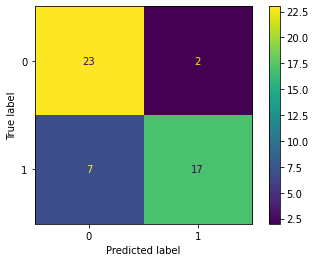

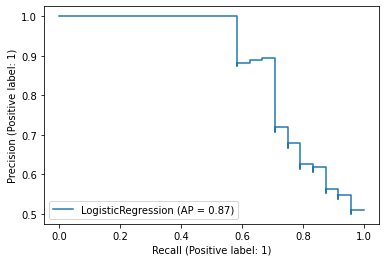

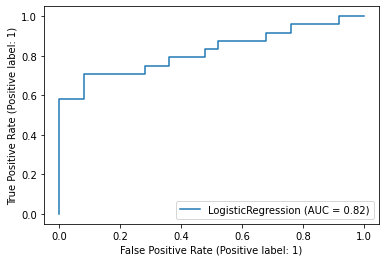

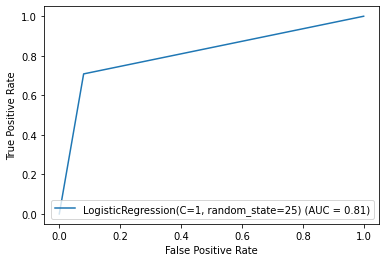

In [26]:
#Logistic Regression
model_LR= LogisticRegression(penalty ='l2',C=1,random_state=25)
model_LR.fit(trainX,trainY)
y_pred_Test = model_LR.predict(testX)
y_pred_Train = model_LR.predict(trainX)
test_acc = accuracy_score(testY, y_pred_Test)
print("y_pred_xgb=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))

LogisticRegression = LogisticRegression(penalty ='l2',C=1,random_state=25)
LogisticRegression= LogisticRegression.fit(trainX, trainY)
plot_confusion_matrix(LogisticRegression,testX,testY)
plot_precision_recall_curve(LogisticRegression,testX,testY)
plot_roc_curve(LogisticRegression,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of Logistic Regression 
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=LogisticRegression)
display.plot()

In [21]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(LogisticRegression(), X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(LogisticRegression(), X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print(statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

0.7647058823529411
0.8125
0.9375
0.9375
0.9375
0.8125
0.9375
0.875
0.875
0.75
0.8639705882352942


In [22]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
cross_val_score = cross_val_score(LogisticRegression,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 82.75735294117646


y_pred_xgb= [1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.8571428571428571
Classification Report : 

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        25
           1       1.00      0.71      0.83        24

    accuracy                           0.86        49
   macro avg       0.89      0.85      0.85        49
weighted avg       0.89      0.86      0.85        49

Classification Report train : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        52

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

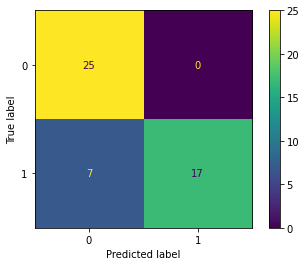

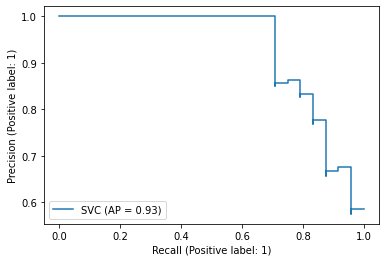

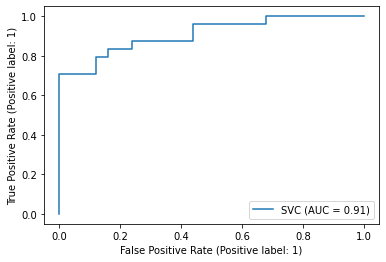

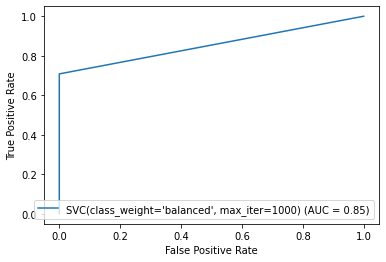

In [27]:
#SVC
model_SVC=SVC(max_iter=1000,class_weight='balanced')
model_SVC.fit(trainX,trainY)
y_pred_Test = model_SVC.predict(testX)
y_pred_Train = model_SVC.predict(trainX)
test_acc = accuracy_score(testY, y_pred_Test)
print("y_pred_xgb=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))

SVCClassifier = SVC(max_iter=1000,class_weight='balanced')
SVCClassifier= SVCClassifier.fit(trainX, trainY)
plot_confusion_matrix(SVCClassifier,testX,testY)
plot_precision_recall_curve(SVCClassifier,testX,testY)
plot_roc_curve(SVCClassifier,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of SVC 
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=SVCClassifier)
display.plot()

In [23]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(SVC(), X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(SVC(), X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print(statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

0.9411764705882353
1.0
0.9375
0.9375
1.0
0.875
0.9375
0.875
0.875
0.8125
0.9191176470588235


In [24]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
SVCClassifier = SVC()
cross_val_score = cross_val_score(SVCClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 86.50735294117646


y_pred_xgb= [1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.8979591836734694
Classification Report : 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       1.00      0.79      0.88        24

    accuracy                           0.90        49
   macro avg       0.92      0.90      0.90        49
weighted avg       0.91      0.90      0.90        49

Classification Report train : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        52

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

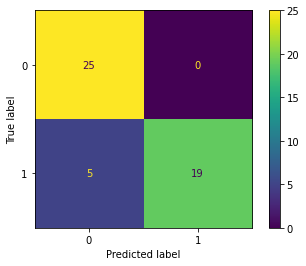

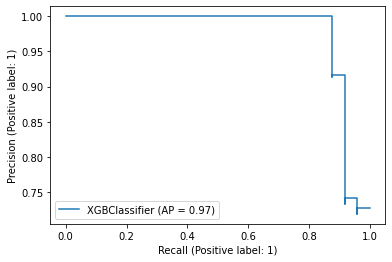

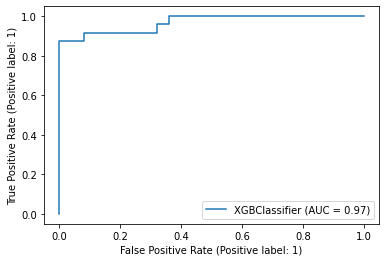

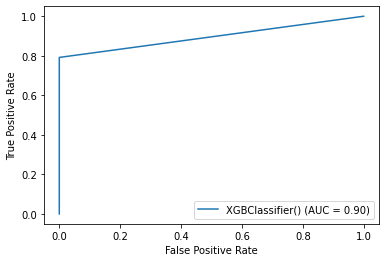

In [29]:
#XGBoost
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(trainX,trainY)
y_pred_Test = model_xgb.predict(testX)
y_pred_Train = model_xgb.predict(trainX)
test_acc = accuracy_score(testY, y_pred_Test)
print("y_pred_xgb=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))

XGBClassifier = XGBClassifier()
XGBClassifier= XGBClassifier.fit(trainX, trainY)
plot_confusion_matrix(XGBClassifier,testX,testY)
plot_precision_recall_curve(XGBClassifier,testX,testY)
plot_roc_curve(XGBClassifier,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of XGBOOST 
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=XGBClassifier)
display.plot()

In [25]:
#Stratified cross validation 
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(XGBClassifier(), X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(XGBClassifier(), X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print(statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

1.0
1.0
1.0
1.0
0.9375
1.0
1.0
0.9375
0.9375
1.0
0.98125


In [26]:
#cross validation
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
cross_val_score = cross_val_score(XGBClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 96.39705882352942
